In [1]:
import pandas as pd
import numpy as np

## load dataset

In [27]:
df = pd.read_csv('Dataset of Diabetes .csv')
df.sample()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
622,83,34465,F,56,4.7,55,12.6,7.9,5.0,1.3,1.6,1.0,37.0,Y


In [28]:
df = df.drop(['ID','No_Pation','Gender','AGE'], axis=1)

In [29]:
df.sample()

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
889,4.2,59,8.9,6.8,4.3,1.2,3.9,1.9,30.0,Y


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Urea    1000 non-null   float64
 1   Cr      1000 non-null   int64  
 2   HbA1c   1000 non-null   float64
 3   Chol    1000 non-null   float64
 4   TG      1000 non-null   float64
 5   HDL     1000 non-null   float64
 6   LDL     1000 non-null   float64
 7   VLDL    1000 non-null   float64
 8   BMI     1000 non-null   float64
 9   CLASS   1000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [31]:
numerical = []
catgcols = []

for col in df.columns :
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)
for col in df.columns :
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)
for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [32]:
df['CLASS'].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [33]:
ind_col = [col for col in df.columns if col != 'CLASS']
dep_col = 'CLASS'

In [34]:
df[dep_col].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

## Transformasi Dataset

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [36]:
df['CLASS'] = le.fit_transform(df['CLASS'])

In [37]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [38]:
df.head()

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,37,26,12,25,5,32,15,4,9,0
1,34,42,12,20,11,13,25,5,7,0
2,37,26,12,25,5,32,15,4,9,0
3,37,26,12,25,5,32,15,4,9,0
4,64,26,12,32,6,6,23,3,3,0


In [73]:
df.to_csv('diabetes-disease.csv', index=False)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## Membuat Model Decision Tree

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy', 
                             max_depth=4, max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_samples_leaf=1,
                             min_samples_split=2, min_weight_fraction_leaf=0.0,
                             random_state=42, splitter='best')

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi Data Training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))

print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

Akurasi Data Training = 0.9775
Akurasi Data Testing = 0.985 

Confusion Matrix : 
[[ 14   0   2]
 [  0   7   1]
 [  0   0 176]]

classification report : 
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       1.00      0.88      0.93         8
           2       0.98      1.00      0.99       176

    accuracy                           0.98       200
   macro avg       0.99      0.92      0.95       200
weighted avg       0.99      0.98      0.98       200



## Simulasi model

In [67]:
input_data = (37,26,12,25,5,32,15,4,9)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Patien with Diabetes')
elif((prediction[1]==1)):
    print ('Patien no Diabetes')
else:
    print ('Patien maybe with Diabetes')

[0]
Pasien terkena Diabetes


c:\Users\ngura\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualisasi Decision Tree

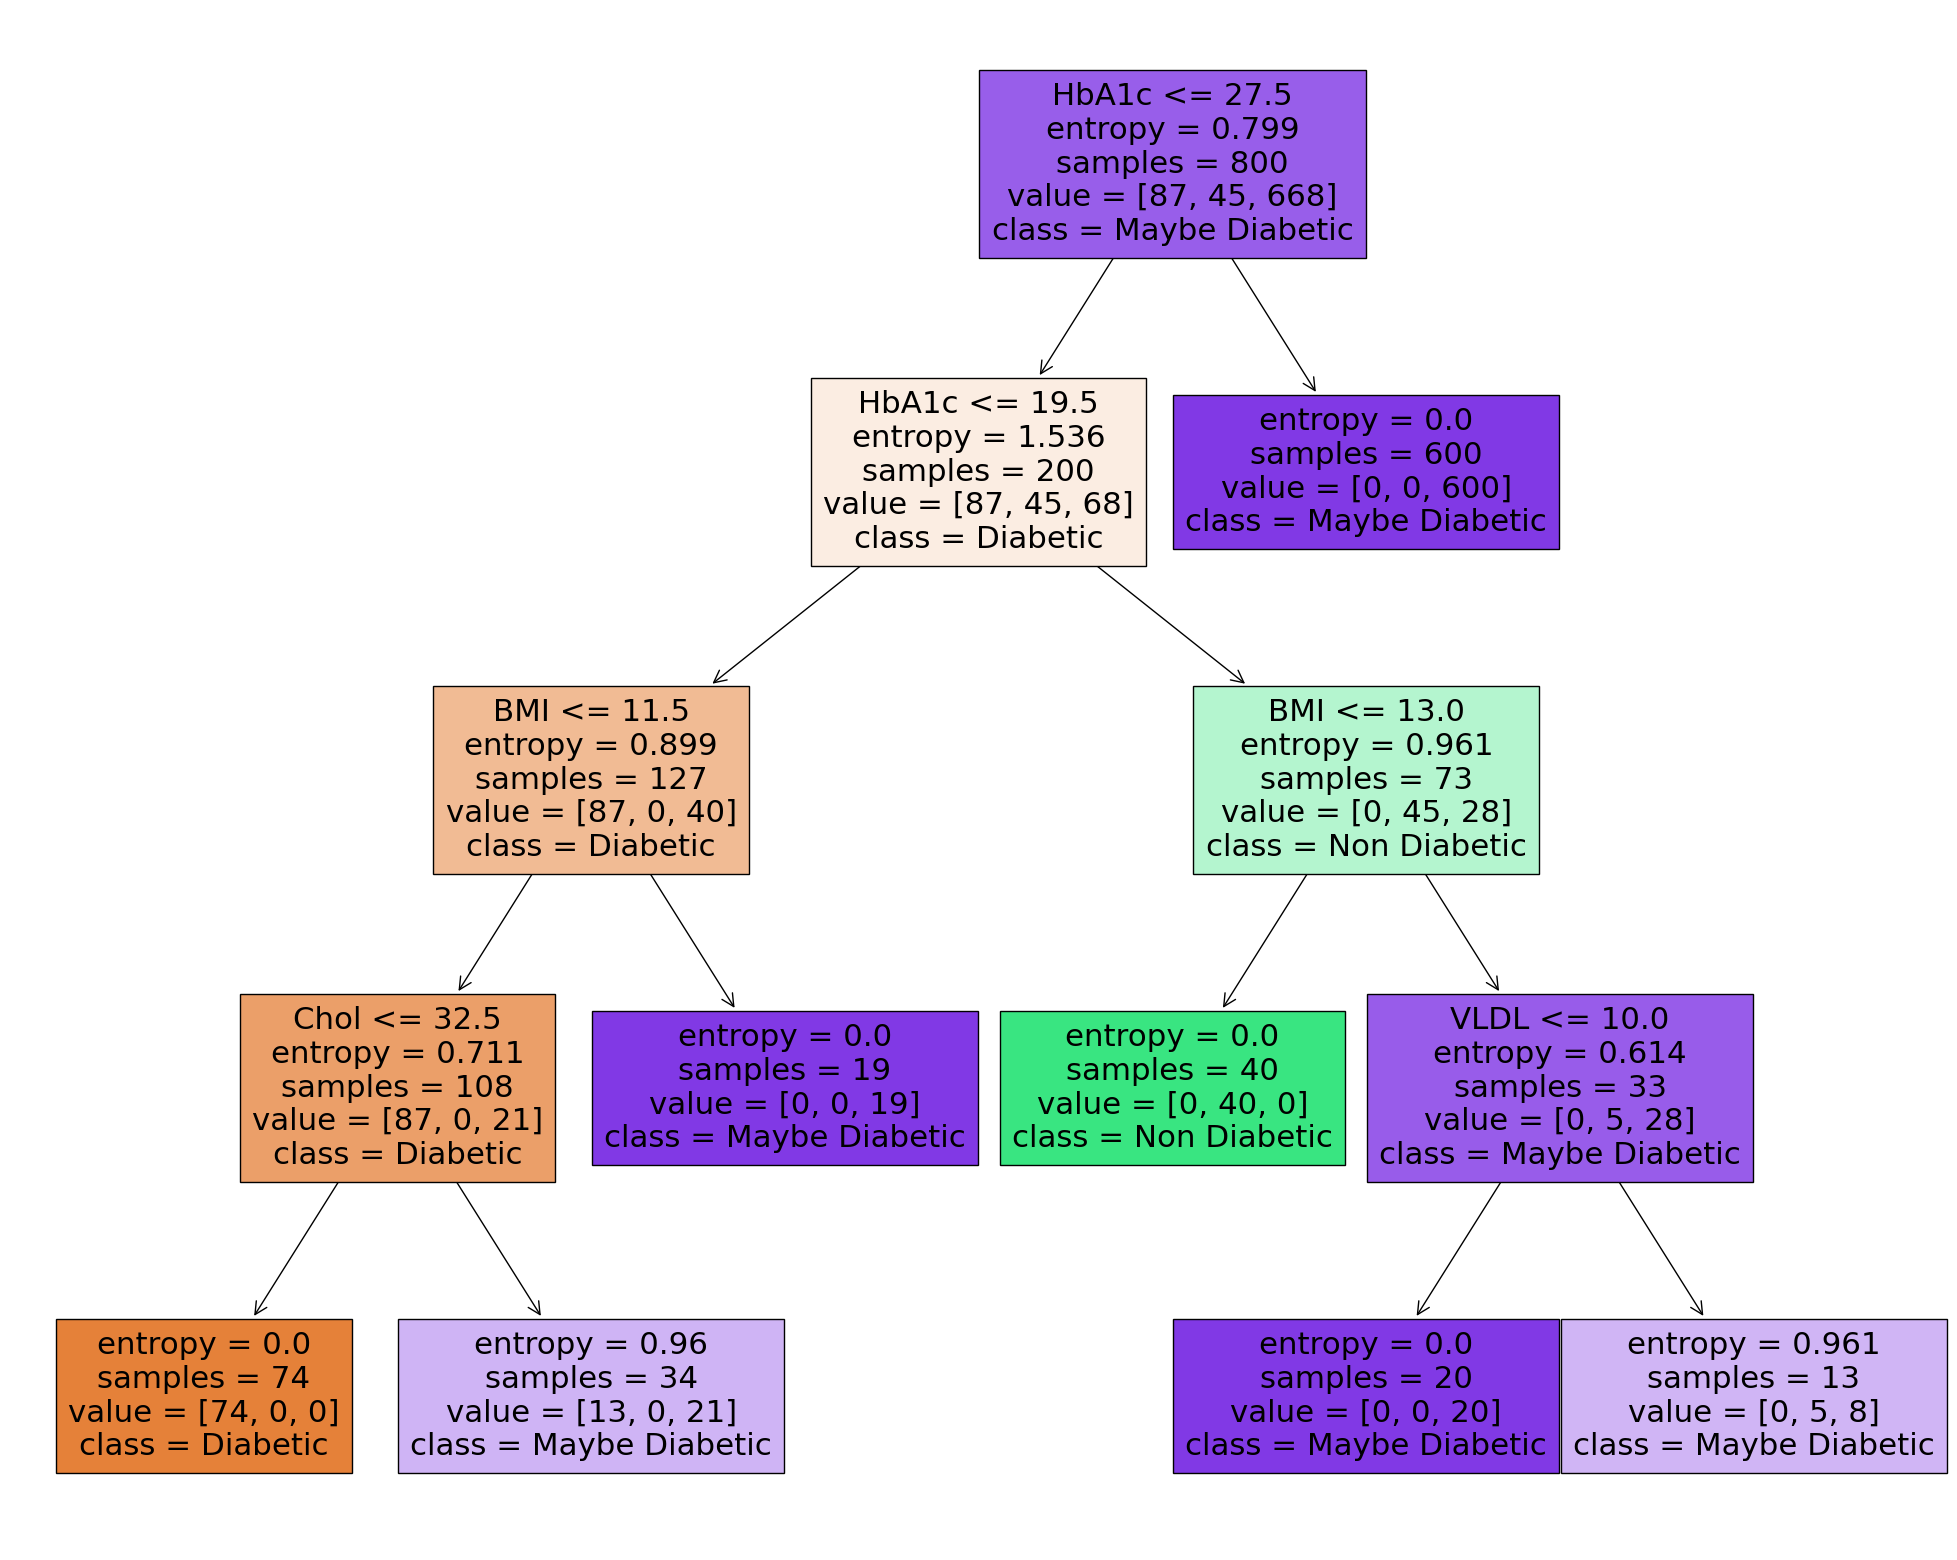

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['Diabetic','Non Diabetic','Maybe Diabetic'],
                   filled=True)